In [82]:
%matplotlib inline
import matplotlib.pyplot as pyplot
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
boston_dataset = datasets.load_boston()
x_full = boston_dataset.data
y = boston_dataset.target
print(x_full.shape)
print(y.shape)

(506, 13)
(506,)


In [84]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [85]:
selector = SelectKBest(f_regression, k=1)
selector.fit(x_full, y)
x = x_full[:, selector.get_support()]
print(x.shape)

(506, 1)


In [86]:
def plot_scatter(x, y, r=None):
    pyplot.scatter(x, y, s=32, marker='o', color='black', facecolors='white')
    if r is not None:
        pyplot.scatter(x, r, color='red', linewidth=0.5)
    pyplot.show()

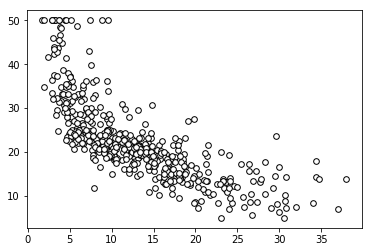

In [87]:
plot_scatter(x,y)

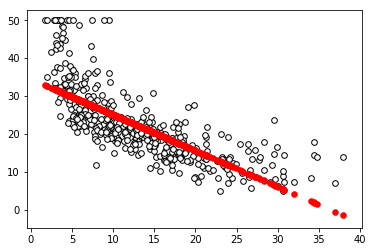

In [88]:
regressor = LinearRegression(normalize=True).fit(x,y)
plot_scatter(x, y, regressor.predict(x))

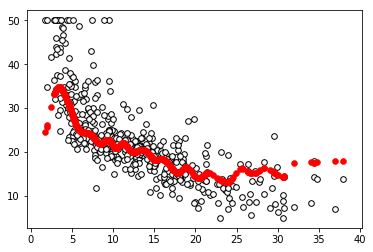

In [89]:
regressor = SVR().fit(x, y)
plot_scatter(x, y, regressor.predict(x))

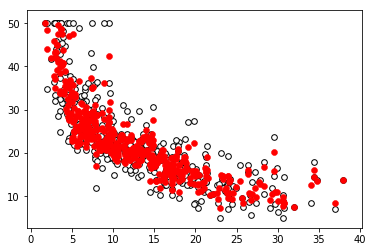

In [90]:
regressor = RandomForestRegressor().fit(x, y)
plot_scatter(x, y, regressor.predict(x))